In [50]:
# импортируйте нужные библиотеки
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.base import BaseEstimator, RegressorMixin

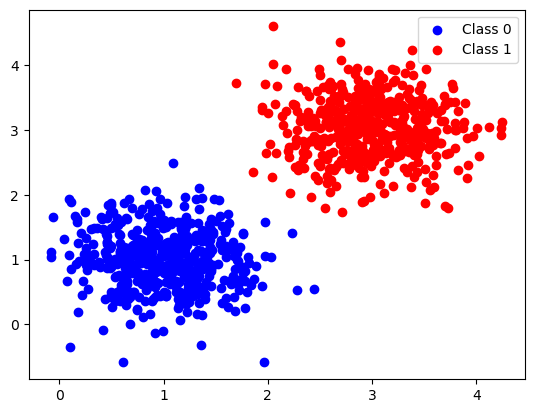

In [35]:
class_0_mean = np.array([1, 1])
class_0_cov = np.array([[0.2, 0], [0, 0.2]])  # Ковариационная матрица
class_0 = np.random.multivariate_normal(class_0_mean, class_0_cov, size=500)

class_1_mean = np.array([3, 3])
class_1_cov = np.array([[0.2, 0], [0, 0.2]])  # Ковариационная матрица
class_1 = np.random.multivariate_normal(class_1_mean, class_1_cov, size=500)

X = np.vstack([class_0, class_1])
y = np.hstack([np.zeros(500), np.ones(500)])

plt.scatter(class_0[:, 0], class_0[:, 1], color='blue', label='Class 0')
plt.scatter(class_1[:, 0], class_1[:, 1], color='red', label='Class 1')
plt.legend()
plt.show()

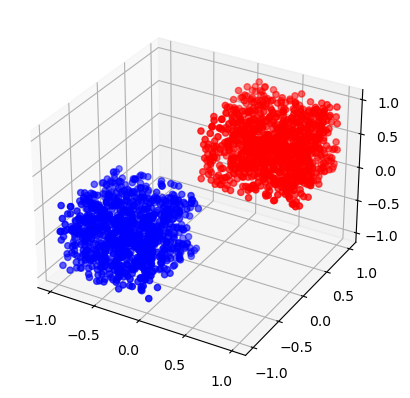

In [74]:
import numpy as np

class1 = np.random.uniform(low=-1, high=0, size=(1000, 3))

class2 = np.random.uniform(low=0, high=1, size=(1000, 3))

X3 = np.vstack([class1, class2])

y3 = np.hstack([np.zeros(1000), np.ones(1000)])

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(class1[:,0], class1[:,1], class1[:,2], c='b')
ax.scatter(class2[:,0], class2[:,1], class2[:,2], c='r')

plt.show()

# Логистическая регрессия

Конечным результатом задачи классификации является разбиение множества объектов на классы. Давайте усложним задачу и будем предсказывать не конкретные классы, а вероятности принадлежать им, например, для бинарной классификации мы будем предсказывать одно число, которое будет соответствовать вероятности принадлежать положительному классу. \
Такого результата можно достичь, если мы будем строить линейную регрессию над некоторыми признаками, а затем её результат переводить в отрезок $[0;1]$. В этом нам поможет сигмоидная функция, которая имеет вид:
<p style="text-align: center;"> $f(z) = \dfrac{1}{1 + e^{-z}}$ </p>

![sigmoid.webp](https://cmertin.github.io/images/2016/11/11_17-Loan_Approvals/Sigmoid_Function.png)
<p style="text-align: center;"></p>

Моделью логистической регрессии назовём функцию от весов и объекта вида:

<p style="text-align: center;"> $a(w, x) = \dfrac{1}{1 + e^{-w_0 - w_1x_1 + ... + w_mx_m}}$ </p>

Обучение данной модели происходит за счет кросс-энтропийной или логистическая функции потерь :
<p style="text-align: center;"> $-\dfrac{1}{n}\sum\limits_{i=1}^{n}(y_ilog(a_i) + (1 - y_i)log(1 - a_i))$ </p>
где $a_i = a(w, x_i)$

#### Задание №1. Выведите шаг градиентного спуска для логистической функции потерь (приложить фото)

не совсем понял, что тут требуется в задании :(

#### Задание №2. Напишите собственную логистическую регрессию

In [45]:
class MyLogRegression:
    def __init__(self, lr=0.1, num_iter=100000):
        self.lr = lr
        self.num_iter = num_iter
    
    def fit(self, X, y):
        X = self.__add_intercept(X)
        self.w = np.random.randn(X.shape[1])
        
        for i in range(self.num_iter):
            z = np.dot(X, self.w)
            h = self.__sigmoid(z)
            gradient = np.dot(X.T, (h - y)) / y.size
            self.w -= self.lr * gradient
    
    def predict(self, X, threshold=0.5):
        X = self.__add_intercept(X)
        return (self.__sigmoid(np.dot(X, self.w)) >= threshold).astype(int)
    
    def __add_intercept(self, X):
        intercept = np.ones((X.shape[0], 1))
        return np.concatenate((intercept, X), axis=1)
    
    def __sigmoid(self, z):
        return 1 / (1 + np.exp(-z))

#### Задание №3. Сравните свою логистическую регрессию с аналогичной моделью из sklearn на сгенерированном датасете, опираясь на Accuracy. Баллы за задание: 10 - Accuracy > 99, 5 - Accuracy > 85, 0 - иначе

### Двумерное

In [72]:
x_train, x_test, y_train, y_test = train_test_split(X, y)

my_log = MyLogRegression()
my_log.fit(x_train, y_train)

sk_log = LogisticRegression()
sk_log.fit(x_train, y_train)

LogisticRegression()

In [73]:
print(f'R2 my_own_: {accuracy_score(y_test, my_log.predict(x_test))}')
print(f'R2 sklearn: {sk_log.score(x_test, y_test)}')

R2 my_own_: 1.0
R2 sklearn: 1.0


### Трехмерное

In [75]:
x_train, x_test, y_train, y_test = train_test_split(X3, y3)

my3_log = MyLogRegression()
my3_log.fit(x_train, y_train)

sk3_log = LogisticRegression()
sk3_log.fit(x_train, y_train)

LogisticRegression()

In [76]:
print(f'R2 my_own_: {accuracy_score(y_test, my3_log.predict(x_test))}')
print(f'R2 sklearn: {sk3_log.score(x_test, y_test)}')

R2 my_own_: 1.0
R2 sklearn: 1.0
